In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('G:/Stuff/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.csv')

In [3]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,STR (The degree of study time of user for rela...
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,LPR (The exam performance of user for related ...
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,PEG (The exam performance of user for goal obj...


In [4]:
df.drop(['Unnamed: 6','Unnamed: 7','Attribute Information:'],axis=1,inplace=True)

In [5]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [6]:
df.shape

(258, 6)

In [7]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

In [8]:
classes=df[' UNS'].value_counts().index
classes

Index(['Middle', 'Low', 'High', 'very_low'], dtype='object')

In [9]:
df[' UNS']=df[' UNS'].astype('category')

In [10]:
df['UNS'] =df[' UNS'].cat.codes

In [11]:
df.drop(' UNS',axis=1,inplace=True)

In [12]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


#### Using LableEncoder

In [13]:
df1 =pd.read_csv('G:/Stuff/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.csv')

In [14]:
df1.drop(['Unnamed: 6','Unnamed: 7','Attribute Information:'],axis=1,inplace=True)

In [15]:
df1.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
LE =LabelEncoder()
df1['UNS'] =LE.fit_transform(df1[' UNS'])

In [18]:
df1.head()

,STG,SCG,STR,LPR,PEG,UNS,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low,3
1,0.08,0.08,0.10,0.24,0.90,High,0
2,0.06,0.06,0.05,0.25,0.33,Low,1
3,0.10,0.10,0.15,0.65,0.30,Middle,2
4,0.08,0.08,0.08,0.98,0.24,Low,1


### Handling missing data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5   UNS     258 non-null    int8   
dtypes: float64(5), int8(1)
memory usage: 10.5 KB


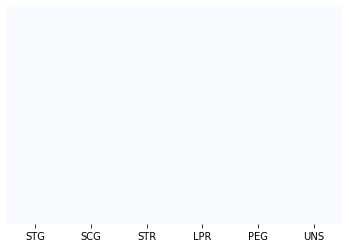

In [20]:
sns.heatmap(data=df.isna(),cbar=False,cmap='Blues',yticklabels=False)

In [21]:
data=df.drop('UNS',axis=1)
target=df['UNS']

In [22]:
data.shape,target.shape

((258, 5), (258,))

In [23]:
df['UNS'].value_counts()

2    88
1    83
0    63
3    24
Name: UNS, dtype: int64

### EDA

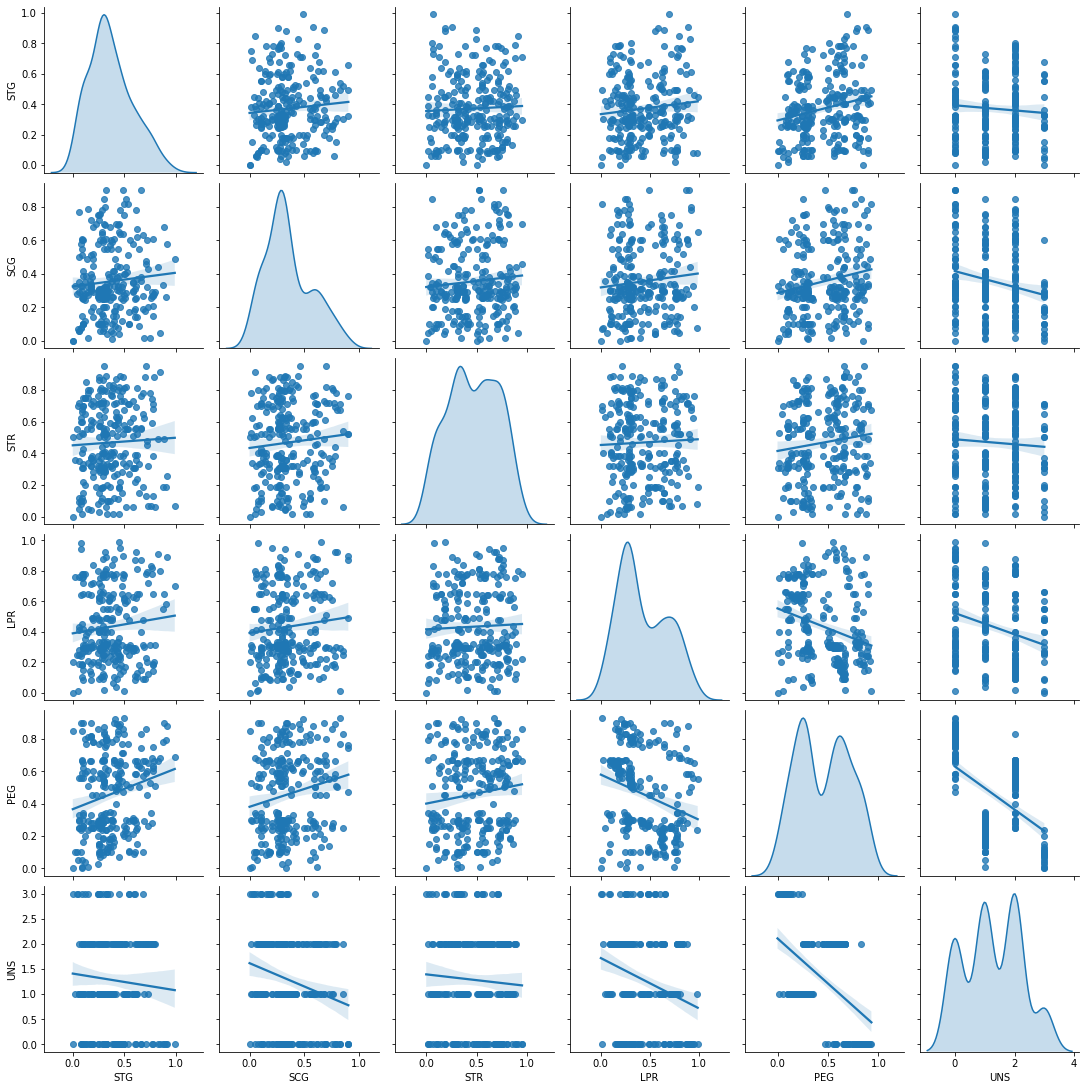

In [24]:
sns.pairplot(df,kind='reg',diag_kind='kde')

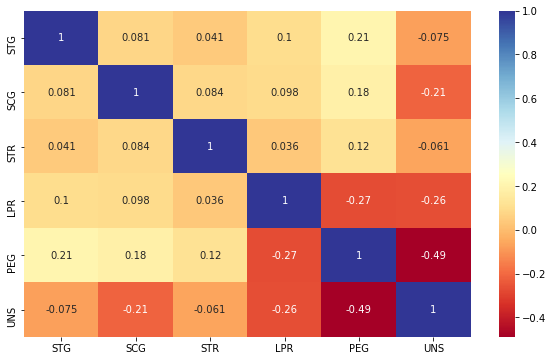

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='RdYlBu',annot=True)

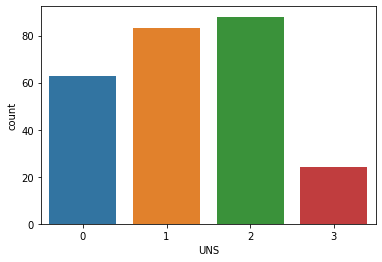

In [26]:
sns.countplot(df['UNS'])

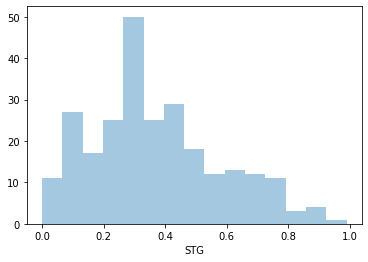

In [27]:
sns.distplot(df['STG'],kde=False,bins=15)

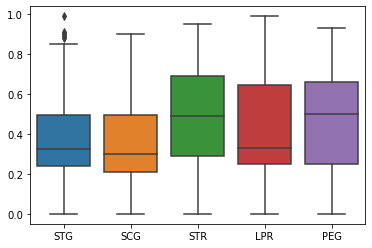

In [28]:
sns.boxplot(data=data)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test =train_test_split(data,target,random_state=0,test_size=0.25)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [32]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
XGB=XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [36]:
y_pred_LR=LR.predict(x_test)

In [37]:
y_pred_KNN=KNN.predict(x_test)

In [38]:
y_pred_RF=RF.predict(x_test)

In [39]:
y_pred_XGB=XGB.predict(x_test)

#### Checking accuracy for Test data

In [40]:
LR.score(x_test,y_test)*100

76.92307692307693

In [41]:
KNN.score(x_test,y_test)*100

81.53846153846153

In [42]:
RF.score(x_test,y_test)*100

95.38461538461539

In [43]:
XGB.score(x_test,y_test)*100

98.46153846153847

#### Checking accuracy for Train data

In [44]:
LR.score(x_train,y_train)*100

76.68393782383419

In [45]:
KNN.score(x_train,y_train)*100

90.15544041450777

In [46]:
RF.score(x_train,y_train)*100

100.0

In [47]:
XGB.score(x_train,y_train)*100

100.0

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [49]:
confusion_matrix(y_pred_XGB,y_test)

array([[12,  0,  0,  0],
       [ 0, 25,  0,  0],
       [ 1,  0, 23,  0],
       [ 0,  0,  0,  4]], dtype=int64)

In [50]:
confusion_matrix(y_pred_LR,y_test)

array([[12,  0,  0,  0],
       [ 0, 19,  4,  4],
       [ 1,  6, 19,  0],
       [ 0,  0,  0,  0]], dtype=int64)

In [51]:
confusion_matrix(y_pred_RF,y_test)

array([[12,  0,  0,  0],
       [ 0, 25,  1,  1],
       [ 1,  0, 22,  0],
       [ 0,  0,  0,  3]], dtype=int64)

In [52]:
confusion_matrix(y_pred_KNN,y_test)

array([[12,  0,  2,  0],
       [ 0, 21,  4,  1],
       [ 1,  2, 17,  0],
       [ 0,  2,  0,  3]], dtype=int64)

In [53]:
print(classification_report(y_pred_XGB,y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00        25
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00         4

    accuracy                           0.98        65
   macro avg       0.98      0.99      0.98        65
weighted avg       0.99      0.98      0.98        65



In [54]:
print(classification_report(y_pred_LR,y_test))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.76      0.70      0.73        27
           2       0.83      0.73      0.78        26
           3       0.00      0.00      0.00         0

    accuracy                           0.77        65
   macro avg       0.63      0.61      0.62        65
weighted avg       0.82      0.77      0.79        65



c:\software\python3.8\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn.externals import joblib

c:\software\python3.8\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [56]:
joblib.dump(XGB,'G:/Stuff/user_know.pkl')

['G:/Stuff/user_know.pkl']

In [57]:
user_know =joblib.load('G:/Stuff/user_know.pkl')

In [58]:
df2=pd.read_csv('G:/Stuff/test_user_know.csv')

In [59]:
df2.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6
0,0.00,0.10,0.50,0.26,0.05,Very Low,NaN
1,0.05,0.05,0.55,0.60,0.14,Low,NaN
2,0.08,0.18,0.63,0.60,0.85,High,NaN
3,0.20,0.20,0.68,0.67,0.85,High,NaN
4,0.22,0.22,0.90,0.30,0.90,High,NaN


In [60]:
df2[' UNS']=df2[' UNS'].astype('category')
df2['UNS'] =df2[' UNS'].cat.codes

In [61]:
df2.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low,NaN,3
1,0.05,0.05,0.55,0.60,0.14,Low,NaN,1
2,0.08,0.18,0.63,0.60,0.85,High,NaN,0
3,0.20,0.20,0.68,0.67,0.85,High,NaN,0
4,0.22,0.22,0.90,0.30,0.90,High,NaN,0


In [62]:
X=df2.drop([' UNS','Unnamed: 6','UNS'],axis=1)
Y=df2['UNS']

In [63]:
X.shape,Y.shape

((145, 5), (145,))

In [64]:
Y.head()

0    3
1    1
2    0
3    0
4    0
Name: UNS, dtype: int8

In [66]:
df2.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low,NaN,3
1,0.05,0.05,0.55,0.60,0.14,Low,NaN,1
2,0.08,0.18,0.63,0.60,0.85,High,NaN,0
3,0.20,0.20,0.68,0.67,0.85,High,NaN,0
4,0.22,0.22,0.90,0.30,0.90,High,NaN,0


In [67]:
df2.shape

(145, 8)

In [68]:
user_know.predict(X)

array([3, 3, 0, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3, 0, 3, 1, 2, 0, 1,
       2, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 3, 1, 0, 3,
       0, 3, 2, 2, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1,
       2, 1, 0, 3, 0, 3, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 3, 1, 2, 1, 0, 3,
       1, 0, 1, 1, 1, 3, 1, 2, 0, 1, 3, 1, 2, 1, 2, 2, 3, 1, 0, 2, 2, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 3, 1, 2, 3, 0, 1, 0, 3, 0, 1, 1,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1], dtype=int8)

In [69]:
user_know.score(X,Y)*100

91.0344827586207